In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx

In [3]:
dubs_id = 1610612744
cavs_id = 1610612739

players = {}
ids = {}
teams = {}
with open("data/players.json") as f:
    data = json.load(f)

for row in data:
    if (row['lastName'] == ""):
        name = row["firstName"]
    else:
        name = row['lastName']+", "+row["firstName"]
    iden = str(row['playerId'])
    players[name] = iden
    ids[iden] = name
    teams[iden] = row['teamId']

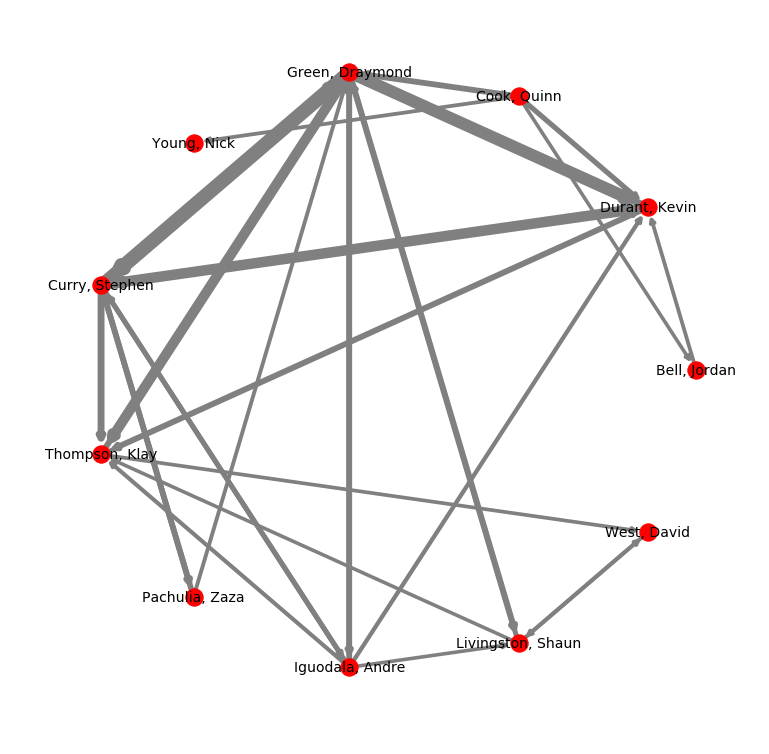

In [4]:
G = nx.DiGraph()
widths = []
labels = {}
for name in players:
    iden = players[name]
    if(teams[iden] != dubs_id):
        continue
    with open("data/"+players[name]+"-passing.json", "r") as f:
        data = json.load(f)
    for key in data:
        if data[key][0] < 3.5:
            continue
        widths.append(data[key][0])
        G.add_edge(name, ids[key], weight = data[key][0])
        labels[str(key)] = ids[key]

weights = [G[u][v]['weight'] for u,v in G.edges()]

plt.figure(figsize=(10,10))
nx.draw_circular(G, with_labels=True,font_size=14, width=weights, edge_color="grey")
nx.write_gml(G, "test.gml")
plt.show()

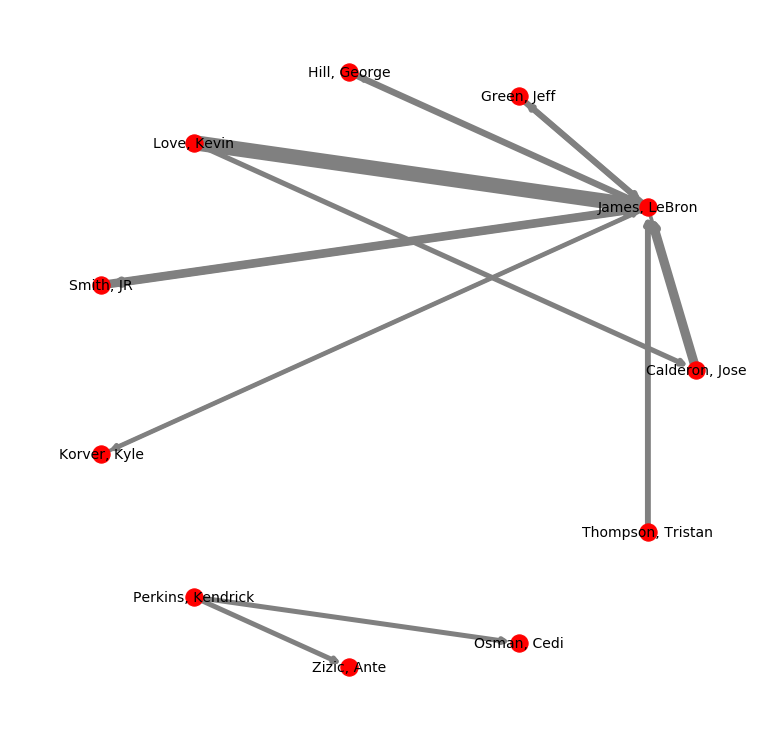

In [6]:
G = nx.DiGraph()
widths = []
labels = {}
for name in players:
    iden = players[name]
    if(teams[iden] != cavs_id):
        continue
    with open("data/"+players[name]+"-passing.json", "r") as f:
        data = json.load(f)
    for key in data:
        if data[key][0] < 3.5 or teams[key] != cavs_id:
            continue
        widths.append(data[key][0])
        G.add_edge(name, ids[key], weight = data[key][0])
        labels[str(key)] = ids[key]

weights = [G[u][v]['weight'] for u,v in G.edges()]

plt.figure(figsize=(10,10))
nx.draw_circular(G, with_labels=True,font_size=14, width=weights, edge_color="grey")
nx.write_gml(G, "test.gml")
plt.show()

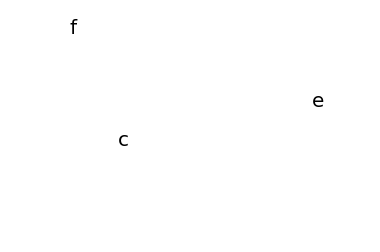